### Раскомментить и установить расширение

In [2]:
# pip install ifcopenshell 


In [8]:
# pip install Pillow

In [9]:
# pip install nbformat

In [10]:
# pip install plotly 

In [11]:
# pip install seaborn

In [ ]:
# pip install pandas

In [17]:
# pip install lark

# Исполняемый код

In [18]:
import ifcopenshell
import pandas as pd

In [66]:
def extract_ifc_properties_to_dataframe(ifc_path, object_type, properties_list) -> pd.DataFrame: 
    # Загрузка IFC файла
    file = ifcopenshell.open(ifc_path)
    
    # Получение всех объектов заданного типа
    objects = file.by_type(object_type)
    
    # Подготовка данных для DataFrame (pandas)
    data = []

    # print(objects[0].get_info())

    for obj in objects:
        obj_data = {'GlobalId': obj.GlobalId, 'obj_type': obj.get_info()['type']}
        for property_set in obj.IsDefinedBy:
            if property_set.is_a('IfcRelDefinesByProperties'):
                property_set_definition = property_set.RelatingPropertyDefinition
                if property_set_definition.is_a('IfcPropertySet'):
                    for (pset_name, prop_name) in properties_list:
                        if property_set_definition.Name == pset_name:
                            for property in property_set_definition.HasProperties:
                                if property.Name == prop_name and property.is_a('IfcPropertySingleValue'):
                                    # Добавляем значение свойства в данные объекта
                                    if property.NominalValue != None:
                                        obj_data[f'{pset_name}.{prop_name}'] = property.NominalValue.wrappedValue
        data.append(obj_data)

    # Создание DataFrame
    df = pd.DataFrame(data)
    df.set_index('GlobalId', inplace=True)
    
    return df

def extract_ifc_properties_list(ifc_path, object_type) -> pd.DataFrame: 
    # Загрузка IFC файла
    file = ifcopenshell.open(ifc_path)
    
    # Получение всех объектов заданного типа
    objects = file.by_type(object_type)
    
    # Подготовка данных для DataFrame (pandas)
    data = []

    # print(objects[0].get_info())

    for obj in objects:
        obj_data = {'GlobalId': obj.GlobalId, 'obj_type': obj.get_info()['type']}
        for rel_def_bty_type in obj
        for property_set in obj.IsDefinedBy:       
            # print(property_set)
            # if property_set.is_a('IFCRELDEFINESBYTYPE'):
            #     print(property_set)
            if property_set.is_a('IfcRelDefinesByProperties'):
                property_set_definition = property_set.RelatingPropertyDefinition                
                if property_set_definition.is_a('IfcPropertySet'):     
                    for property in property_set_definition.HasProperties:
                        if property.is_a('IfcPropertySingleValue'):
                            # Добавляем значение свойства в данные объекта
                            if property.NominalValue != None:
                                obj_data[f'{property_set_definition.Name}.{property.Name}'] = property.NominalValue.wrappedValue
                                

        data.append(obj_data)

    # Создание DataFrame
    df = pd.DataFrame(data)
    df.set_index('GlobalId', inplace=True)
    
    return df


In [67]:
# Пример использования функции
ifc_path = 'Ifc4_Revit_ARC.ifc'
object_type = 'IfcRailing'

# Кортеж из интересующих ('propertyset name','property name')
properties_list = [
    ('Tekla Quantity', 'Weight'),
    ('Идентификация', "Категория ТСС"),
    ('Геометрические параметры', 'Высота'),
    ('Геометрические параметры', 'Длина'),
    ('Маркировка', 'Сечение в каталоге Tekla')
]

df_list_all = extract_ifc_properties_list(ifc_path, object_type)
df_list_all

,obj_type,Pset_EnvironmentalImpactIndicators.Reference,Pset_RailingCommon.IsExternal,Pset_RailingCommon.Reference,Pset_RailingCommon.Height
GlobalId,,,,,
1v0G0fYgbCaRB8j$bCldej,IfcRailing,SH_1100mm,False,SH_1100mm,1100.0
0344_EjZb5chH4bVWlO1Dl,IfcRailing,SH_1100mm,False,SH_1100mm,1100.0
2ZlFFrvcbDavSm_g3LjLiI,IfcRailing,SH_1100mm,False,SH_1100mm,1100.0
1XYPH1jhn1UAOARoEEqzJ5,IfcRailing,SH_1100mm,False,SH_1100mm,1100.0
1XYPH1jhn1UAOARoEEqzG5,IfcRailing,SH_1100mm,False,SH_1100mm,1100.0
1XYPH1jhn1UAOARoEEqzNQ,IfcRailing,SH_1100mm,False,SH_1100mm,1100.0
1SDKa3RCzEzvwMoVlm1Auv,IfcRailing,SH_1100mm,False,SH_1100mm,1100.0
1SDKa3RCzEzvwMoVlm1A$s,IfcRailing,SH_1100mm,False,SH_1100mm,1100.0
0H7vgQcNjEo8efFHzwVqPR,IfcRailing,SH_1100mm,False,SH_1100mm,1100.0


In [34]:
df = extract_ifc_properties_to_dataframe(ifc_path, object_type, properties_list)
df.obj_type.value_counts()

obj_type
IfcDoor    16
Name: count, dtype: int64

In [32]:
df.loc[:,'obj_type'].value_counts()

obj_type
IfcDoor    16
Name: count, dtype: int64

In [25]:
df.loc[df['obj_type'] == 'IfcBeam',['obj_type','Маркировка.Сечение в каталоге Tekla']]

,obj_type,Маркировка.Сечение в каталоге Tekla
GlobalId,,
0cryUIbA55I9w6zXlNGfwV,IfcBeam,U16P_8240_97
0JG_ZbA9T1Q8XB5M4qoezx,IfcBeam,U16P_8240_97
0D$inzAnnDXvy7fR5jDtv5,IfcBeam,PK80X5.0_32931_2015
0pkwX3ikD4_efCR4HnegNh,IfcBeam,PK80X5.0_32931_2015
3Ng8LAREv6BABhOPewuZKz,IfcBeam,PK80X5.0_32931_2015
...,...,...
2JPJHsQLT1zOPsMqvJDdo9,IfcBeam,U16P_8240_97
3NKQ$V9k1F3gAKixq4dbqM,IfcBeam,I30H2_57837_2017
131ujOmhvA8QUlDsviILBl,IfcBeam,U20P_8240_97


In [22]:
df.describe()

,Геометрические параметры.Высота,Геометрические параметры.Длина,Tekla Quantity.Weight
count,1304.000000,1304.000000,2054.000000
mean,108.114110,2247.817945,42.984031
std,78.078829,3849.917313,175.127039
min,24.000000,12.000000,0.000000
25%,55.000000,500.000000,1.000000
50%,80.000000,1351.800000,11.280000
75%,160.000000,3149.000000,23.030000
max,800.000000,42740.900000,3200.000000


In [ ]:
# pip install nbformat

  Using cached jsonschema-4.21.1-py3-none-any.whl.metadata (7.8 kB)
  Using cached attrs-23.2.0-py3-none-any.whl.metadata (9.5 kB)
  Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached referencing-0.33.0-py3-none-any.whl.metadata (2.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 857.3 kB/s eta 0:00:000:00:01
Using cached jsonschema-4.21.1-py3-none-any.whl (85 kB)
Using cached attrs-23.2.0-py3-none-any.whl (60 kB)
Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl (18 kB)
Using cached referencing-0.33.0-py3-none-any.whl (26 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 333.0/333.0 kB 1.1 MB/s eta 0:00:00ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [28]:
df.to_csv('ifc_extracted_data.csv', sep=",")

In [12]:
import plotly.express as px
import seaborn as sns

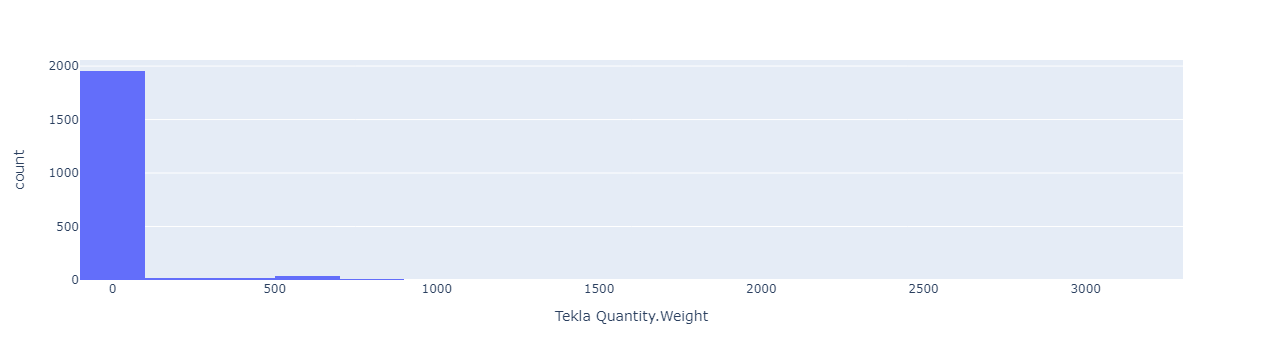

In [31]:
fig = px.histogram(df, x="Tekla Quantity.Weight", nbins=30)
fig.show()

In [11]:

def data_mean():
sample_data = pd.DataFrame({
    'income': df.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [df.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [df.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])

,Model,Year,Encoder,Task,Score
0,ERNIE,2019,Transformer,CoLA,75.5
1,T5,2019,Transformer,CoLA,71.6
2,RoBERTa,2019,Transformer,CoLA,67.8
3,BERT,2018,Transformer,CoLA,60.5
4,BiLSTM+ELMo,2018,LSTM,CoLA,32.1
...,...,...,...,...,...
59,BERT,2018,Transformer,RTE,70.1
60,BiLSTM+ELMo,2018,LSTM,RTE,57.4
61,BiLSTM+CoVe,2017,LSTM,RTE,52.7
62,BiLSTM+Attn,2017,LSTM,RTE,58.4
